# Imersão de dados 03 - Alura

### Aluno: Guilherme Barros Alves Pereira

# Aula 04 - Merge de dados e análise de resultados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()

In [2]:
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
dados = pd.read_csv(url_dados, compression='zip')

mapa = {'droga': 'composto'}
dados.rename(columns=mapa, inplace=True)

dados.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [3]:
compostos = dados['composto'].value_counts().index[:5]

In [4]:
dados_resultado_endereço = 'https://raw.githubusercontent.com/alura-cursos/imersaodados3/main/dados/dados_resultados.csv'
dados_resultados = pd.read_csv(dados_resultado_endereço)
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
dados_resultados['n_moa'] = dados_resultados.drop('id', axis=1).sum(axis=1)
dados_resultados['ativo_moa'] = (dados_resultados['n_moa'] != 0)
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True


In [6]:
dados_combinados = pd.merge(dados, dados_resultados[['id', 'n_moa', 'ativo_moa']], on='id')
dados_combinados.head()

,id,tratamento,tempo,dose,composto,g-0,g-1,g-2,g-3,g-4,...,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo_moa']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y,random_state=376)

modelo_rlogistica = LogisticRegression(max_iter=1000)   
modelo_rlogistica.fit(X_train, y_train)

modelo_rlogistica.score(X_test, y_test)

0.6264959059416334

In [41]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

modelo_dummy = DummyClassifier(strategy='most_frequent')
modelo_dummy.fit(X_train, y_train)
previsao = modelo_dummy.predict(X_test)

accuracy_score(y_test, previsao)

0.6067604450976275

In [20]:
dados_combinados['ativo_moa'].value_counts(normalize=True)

True     0.60666
False    0.39334
Name: ativo_moa, dtype: float64

In [57]:
from sklearn.tree import DecisionTreeClassifier

x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo_moa']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify = y,random_state=376)

modelo_arvore = DecisionTreeClassifier(max_depth=3)
modelo_arvore.fit(X_train, y_train)
modelo_arvore.score(X_test, y_test)

0.6199874028973336

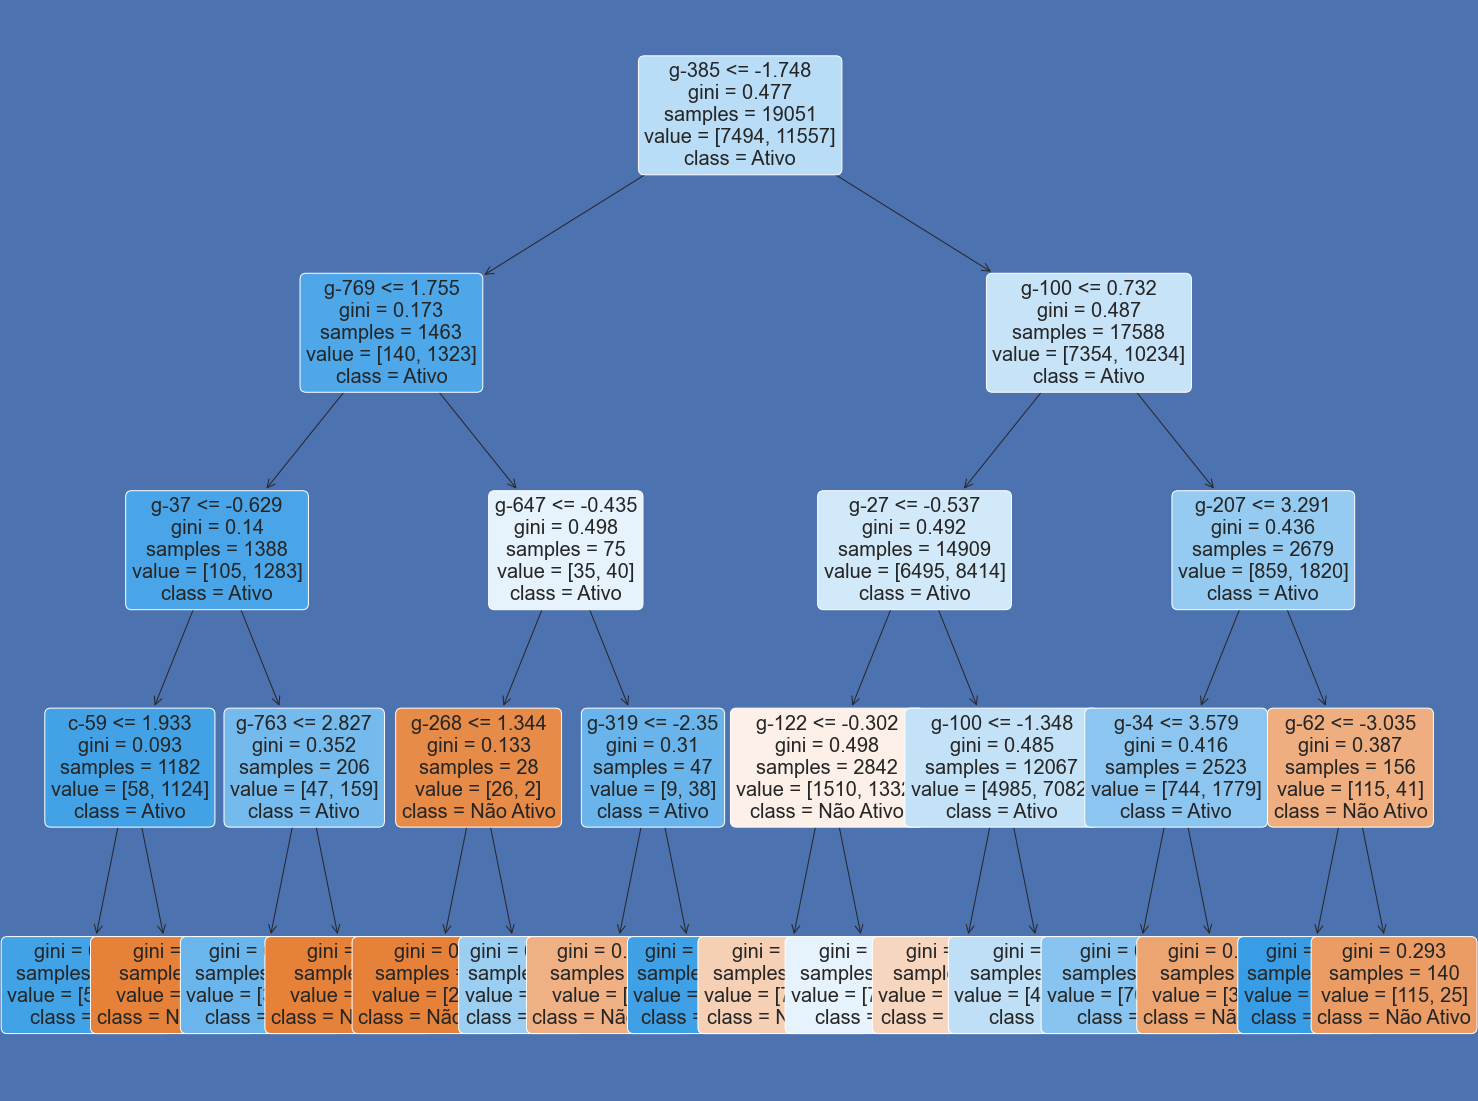

In [58]:
from sklearn import tree

fig, ax = plt.subplots(figsize=(25,20), facecolor='b')

tree.plot_tree(modelo_arvore, 
               ax=ax,
               fontsize=20,
               rounded=True,
               filled=True,
               feature_names=X_train.columns,
               class_names=['Não Ativo', 'Ativo'])
plt.show()

In [60]:
teste = []
treino = []

for i in range(1,15):
    modelo_arvore = DecisionTreeClassifier(max_depth=i)
    modelo_arvore.fit(X_train, y_train)
    teste.append(modelo_arvore.score(X_test, y_test))
    treino.append(modelo_arvore.score(X_train, y_train))

In [61]:
teste

[0.6067604450976275,
 0.6067604450976275,
 0.6105395758975436,
 0.6208272097417594,
 0.6208272097417594,
 0.6180978374973756,
 0.6216670165861852,
 0.6208272097417594,
 0.6153684652529918,
 0.6117992861641822,
 0.6086500104975856,
 0.6021415074532858,
 0.5954230526978795,
 0.5994121352089019]

In [62]:
treino

[0.6066348223190384,
 0.6066348223190384,
 0.6211222508004829,
 0.6360820954280615,
 0.6412261823526324,
 0.6489423127394888,
 0.6606477350270327,
 0.6707259461445594,
 0.689570101307018,
 0.7068395359823632,
 0.7294630203138943,
 0.752926355571886,
 0.7770195790247231,
 0.7990656658443126]

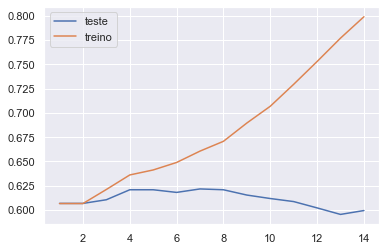

In [64]:
sns.lineplot(x=range(1,15), y=teste, label='teste')
sns.lineplot(x=range(1,15), y=treino, label='treino')
plt.show()

In [67]:
pd.get_dummies(dados_combinados, columns=['dose', 'tratamento', 'tempo', ])

,id,composto,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,...,c-99,n_moa,ativo_moa,dose_D1,dose_D2,tratamento_com_controle,tratamento_com_droga,tempo_24,tempo_48,tempo_72
0,id_000644bb2,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,...,0.4176,1,True,1,0,0,1,1,0,0
1,id_000779bfc,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,...,0.7371,0,False,1,0,0,1,0,0,1
2,id_000a6266a,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,...,0.6931,3,True,1,0,0,1,0,1,0
3,id_0015fd391,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,...,-0.8154,0,False,1,0,0,1,0,1,0
4,id_001626bd3,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,...,0.7125,1,True,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,...,0.4680,1,True,0,1,0,1,1,0,0
23810,id_fffb70c0c,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,...,0.3689,1,True,0,1,0,1,1,0,0
23811,id_fffc1c3f4,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,...,0.3808,0,False,0,1,1,0,0,1,0
23812,id_fffcb9e7c,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,...,0.0740,1,True,1,0,0,1,1,0,0


In [68]:
from sklearn.ensemble import RandomForestClassifier

x = dados_combinados.drop(['id', 'n_moa', 'ativo_moa', 'composto'], axis=1)
x = pd.get_dummies(x, columns=['dose', 'tratamento', 'tempo', ])
y = dados_combinados['ativo_moa']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify = y,random_state=376)

modelo_randomForest = RandomForestClassifier()
modelo_randomForest.fit(X_train, y_train)
modelo_randomForest.score(X_test, y_test)

0.6789838337182448

## Desafio 01: Tente outros modelos ou mude os parametros dos modelos testados

## Desafio 02: Estude a documentação do sklearn

## Desafio 03: Pesquisar o fluxograma 'Chose the right estimator' do sklearn

## Desafio 04: Teste outras problemas (perguntas) 0, 1 ou mais

## Desafio 05: Escolher a droga mais utilizada e tente prever criar um modelo para prever se a label é controle ou não

## Desafio 06: Resume o que você aprendeu com os dados